In [2]:
# General Use
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
from matplotlib import pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Training
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Model Evaluation
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report, auc, precision_recall_curve

ModuleNotFoundError: No module named 'statsmodels'

In [193]:
 df_withheader = pd.read_csv("FIXED imputed clin biomed df 11-20.csv", 
                  
                  names= ['concentration',
 'plate_column',
 'source_center',
 'volume',
 'a260_a280_ratio',
 'normal_tumor_genotype_match',
 'pcr_amplification_successful',
 'intermediate_dimension',
 'is_ffpe',
 'longest_dimension',
 'sample_type_id',
 'shortest_dimension',
 'percent_necrosis',
 'percent_normal_cells',
 'percent_stromal_cells',
 'percent_tumor_cells',
 'percent_tumor_nuclei',
 'section_location',
 'pharmaceutical_therapy_type',
 'pharmaceutical_tx_started_days_to_x',
 'pharmaceutical_tx_ongoing_indicator',
 'pharmaceutical_tx_ended_days_to',
 'pharma_adjuvant_cycles_count',
 'radiation_treatment_adjuvant_x',
 'pharmaceutical_tx_adjuvant_x',
 'treatment_outcome_first_course_x',
 'vital_status_x',
 'last_contact_days_to_x',
 'birth_days_to',
 'ethnicity',
 'history_neoadjuvant_treatment_y',
 'vital_status_y',
 'last_contact_days_to_y',
 'tumor_grade',
 'age_at_initial_pathologic_diagnosis',
 'days_to_initial_pathologic_diagnosis',
 'tissue_source_site',
 'DNA',
 'GenomePlex (Rubicon) Amplified DNA',
 'RNA',
 'Repli-G (Qiagen) DNA',
 'Total RNA',
 'PicoGreen',
 'UV Spec',
 'Blood Derived Normal',
 'Primary Tumor',
 'Recurrent Tumor',
 'Solid Tissue Normal',
 'IP',
 'IP|IV',
 'IV',
 'Other (specify below)',
 'PO',
 'ADJUVANT',
 'OTHER, SPECIFY IN NOTES',
 'PALLIATIVE',
 'PROGRESSION',
 'RECURRENCE',
 'AMERICAN INDIAN OR ALASKA NATIVE',
 'ASIAN',
 'BLACK OR AFRICAN AMERICAN',
 'NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER',
 'WHITE',
 'Cytology (e.g. Peritoneal or pleural fluid)',
 'Excisional Biopsy',
 'Fine needle aspiration biopsy',
 'Incisional Biopsy',
 'Other method, specify:',
 'Tumor resection',
 'Bilateral',
 'Left',
 'Right',
 'Omentum',
 'Ovary',
 'Peritoneum ovary',
 '1-10 mm',
 '11-20 mm',
 '>20 mm',
 'No Macroscopic disease',
 'Stage IA',
 'Stage IB',
 'Stage IC',
 'Stage IIA',
 'Stage IIB',
 'Stage IIC',
 'Stage IIIA',
 'Stage IIIB',
 'Stage IIIC',
 'Stage IV'])

In [194]:
df_withheader.head(10)

,concentration,plate_column,source_center,volume,a260_a280_ratio,normal_tumor_genotype_match,pcr_amplification_successful,intermediate_dimension,is_ffpe,longest_dimension,sample_type_id,shortest_dimension,percent_necrosis,percent_normal_cells,percent_stromal_cells,percent_tumor_cells,percent_tumor_nuclei,section_location,pharmaceutical_therapy_type,pharmaceutical_tx_started_days_to_x,pharmaceutical_tx_ongoing_indicator,pharmaceutical_tx_ended_days_to,pharma_adjuvant_cycles_count,radiation_treatment_adjuvant_x,pharmaceutical_tx_adjuvant_x,treatment_outcome_first_course_x,vital_status_x,last_contact_days_to_x,birth_days_to,ethnicity,history_neoadjuvant_treatment_y,vital_status_y,last_contact_days_to_y,tumor_grade,age_at_initial_pathologic_diagnosis,days_to_initial_pathologic_diagnosis,tissue_source_site,DNA,GenomePlex (Rubicon) Amplified DNA,RNA,Repli-G (Qiagen) DNA,Total RNA,PicoGreen,UV Spec,Blood Derived Normal,Primary Tumor,Recurrent Tumor,Solid Tissue Normal,IP,IP|IV,IV,Other (specify below),PO,ADJUVANT,"OTHER, SPECIFY IN NOTES",PALLIATIVE,PROGRESSION,RECURRENCE,AMERICAN INDIAN OR ALASKA NATIVE,ASIAN,BLACK OR AFRICAN AMERICAN,NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER,WHITE,Cytology (e.g. Peritoneal or pleural fluid),Excisional Biopsy,Fine needle aspiration biopsy,Incisional Biopsy,"Other method, specify:",Tumor resection,Bilateral,Left,Right,Omentum,Ovary,Peritoneum ovary,1-10 mm,11-20 mm,>20 mm,No Macroscopic disease,Stage IA,Stage IB,Stage IC,Stage IIA,Stage IIB,Stage IIC,Stage IIIA,Stage IIIB,Stage IIIC,Stage IV
0,NaN,0.00,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.000000,21.000000,22.000000,23.0,24.0,25.0,26.0,27.0,28.0,29.000000,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,51.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,60.0,61.0,62.0,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0,73.0,74.0,75.0,76.0,77.0,78.0,79.0,80.0,81.0,82.0,83.0,84.0,85.0,86.0,87.0
1,0.0,0.15,4.0,22.0,6.7,1.9,1.0,1.0,0.8,0.0,1.0,1.0,0.6,0.0,2.0,0.0,98.0,99.0,0.0,1.0,290.0,0.000000,729.000000,13.000000,1.0,1.0,1.0,0.0,788.0,-23307.0,0.001088,0.0,0.0,788.0,3.0,63.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.15,4.0,22.0,6.7,1.9,1.0,1.0,0.8,0.0,1.0,1.0,0.6,0.0,2.0,0.0,98.0,99.0,0.0,1.0,8.0,0.000000,143.000000,6.000000,1.0,1.0,1.0,0.0,788.0,-23307.0,-0.016903,0.0,0.0,788.0,3.0,63.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2.0,0.15,4.0,22.0,6.7,1.9,1.0,1.0,0.8,0.0,1.0,1.0,0.6,0.0,2.0,0.0,98.0,99.0,0.0,1.0,8.0,0.000000,143.000000,6.000000,1.0,1.0,1.0,0.0,788.0,-23307.0,-0.016903,0.0,0.0,788.0,3.0,63.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,3.0,0.15,4.0,22.0,6.7,1.9,1.0,1.0,0.8,0.0,1.0,1.0,0.6,0.0,2.0,0.0,98.0,99.0,0.0,0.0,232.0,0.146806,386.494880,5.513280,1.0,1.0,1.0,0.0,788.0,-23307.0,-0.026980,0.0,0.0,788.0,3.0,63.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,4.0,0.15,4.0,22.0,6.7,1.9,1.0,1.0,0.8,0.0,1.0,1.0,0.6,0.0,5.0,0.0,95.0,99.0,1.0,1.0,290.0,0.000000,729.000000,13.000000,1.0,1.0,1.0,0.0,788.0,-23307.0,0.000776,0.0,0.0,788.0,3.0,63.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,5.0,0.15,4.0,22.

In [195]:
df_withheader = df_withheader.iloc[1:]

In [196]:
data = df_withheader

In [197]:
 
data.shape
data.isna().sum()*100/len(data)

(234454, 89)

concentration                                  0.0
plate_column                                   0.0
source_center                                  0.0
volume                                         0.0
a260_a280_ratio                                0.0
normal_tumor_genotype_match                    0.0
pcr_amplification_successful                   0.0
intermediate_dimension                         0.0
is_ffpe                                        0.0
longest_dimension                              0.0
sample_type_id                                 0.0
shortest_dimension                             0.0
percent_necrosis                               0.0
percent_normal_cells                           0.0
percent_stromal_cells                          0.0
percent_tumor_cells                            0.0
percent_tumor_nuclei                           0.0
section_location                               0.0
pharmaceutical_therapy_type                    0.0
pharmaceutical_tx_started_days_

In [198]:
 data = data[data['treatment_outcome_first_course_x'].isin([0,1])]

In [199]:
data.treatment_outcome_first_course_x.value_counts

<bound method IndexOpsMixin.value_counts of 1         1.0
2         1.0
3         1.0
4         1.0
5         1.0
         ... 
233554    1.0
233555    1.0
233556    1.0
233557    1.0
233558    1.0
Name: treatment_outcome_first_course_x, Length: 210696, dtype: float64>

In [200]:
data.shape

(210696, 89)

In [201]:
# observe values for each column before preprocessing
for col in data.columns:
    print('\n', col)
    print(data[col].value_counts())



 concentration
145436.0    1
86795.0     1
165400.0    1
173595.0    1
135732.0    1
           ..
215709.0    1
19702.0     1
69360.0     1
107854.0    1
0.0         1
Name: concentration, Length: 210696, dtype: int64

 plate_column
 5.000000e-01    63394
 1.500000e-01    53320
 1.600000e-01    29389
 1.400000e-01    23262
 1.000000e-01     9024
                 ...  
-4.042640e+09        1
-4.042640e+09        1
-4.042640e+09        1
-4.042640e+09        1
-4.042640e+09        1
Name: plate_column, Length: 1299, dtype: int64

 source_center
 1.000000e+00    40300
 2.000000e+00    33836
 3.000000e+00    27611
 4.000000e+00    22120
 5.000000e+00    20103
                 ...  
-6.371426e+12        1
-6.371426e+12        1
-6.371426e+12        1
-6.371426e+12        1
-6.371426e+12        1
Name: source_center, Length: 960, dtype: int64

 volume
 2.200000e+01    202605
 2.300000e+01      3157
-5.719188e+09        48
-5.719188e+09        48
-5.719188e+09        30
                  ..

In [202]:
data.drop(columns="pharmaceutical_tx_ongoing_indicator", inplace=True)
data.drop(columns="Recurrent Tumor", inplace=True)
data.drop(columns="Primary Tumor", inplace=True)
data.drop(columns="RECURRENCE", inplace=True)
data.drop(columns="OTHER, SPECIFY IN NOTES", inplace=True)

data.drop(columns="pharmaceutical_therapy_type", inplace=True)
data.drop(columns="pharmaceutical_tx_started_days_to_x", inplace=True)
data.drop(columns="pharmaceutical_tx_ended_days_to", inplace=True)
 

/gpfs/runtime/opt/anaconda/2020.02/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [203]:
 
data.shape
data.isna().sum()*100/len(data)

(210696, 81)

concentration                                  0.0
plate_column                                   0.0
source_center                                  0.0
volume                                         0.0
a260_a280_ratio                                0.0
normal_tumor_genotype_match                    0.0
pcr_amplification_successful                   0.0
intermediate_dimension                         0.0
is_ffpe                                        0.0
longest_dimension                              0.0
sample_type_id                                 0.0
shortest_dimension                             0.0
percent_necrosis                               0.0
percent_normal_cells                           0.0
percent_stromal_cells                          0.0
percent_tumor_cells                            0.0
percent_tumor_nuclei                           0.0
section_location                               0.0
pharma_adjuvant_cycles_count                   0.0
radiation_treatment_adjuvant_x 

In [204]:
data.drop(columns="PROGRESSION", inplace=True)
data.drop(columns="last_contact_days_to_y", inplace=True)
data.drop(columns="last_contact_days_to_x", inplace=True)
data.drop(columns="tissue_source_site", inplace=True) 
data.drop(columns="history_neoadjuvant_treatment_y", inplace=True)
data.drop(columns="pharma_adjuvant_cycles_count", inplace=True)

data.drop(columns="PALLIATIVE", inplace=True)
data.drop(columns="ADJUVANT", inplace=True)
data.drop(columns="pharmaceutical_tx_adjuvant_x", inplace=True)
data.drop(columns="radiation_treatment_adjuvant_x", inplace=True)

#The below features can be added back in, dropping did not help reduce auc roc and they are liekly helpful features
data.drop(columns="Stage IA", inplace=True)
data.drop(columns="Stage IB", inplace=True)
data.drop(columns="Stage IC", inplace=True)
data.drop(columns="Stage IIA", inplace=True)
data.drop(columns="Stage IIB", inplace=True)
data.drop(columns="Stage IIC", inplace=True)
data.drop(columns="Stage IIIA", inplace=True)
data.drop(columns="Stage IIIB", inplace=True)
data.drop(columns="Stage IIIC", inplace=True)

data.drop(columns="Stage IV", inplace=True) 

In [205]:
data.shape

(210696, 61)

In [206]:
X = data.drop(columns='treatment_outcome_first_course_x')
y = data['treatment_outcome_first_course_x']

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [208]:
def rs_cv_fit_score(model, hyparams):
    best_clf = RandomizedSearchCV(model, hyparams, scoring='accuracy', n_jobs=48, pre_dispatch=24, cv=5)
    best_clf.fit(X_train, y_train)
    print('Best Parameters - ', best_clf.best_params_)
    print('Accuracy - %0.2f' % best_clf.best_score_*100)
    return best_clf

In [209]:
def plot_roc_curve(best_clf):
    y_predict_prob = best_clf.predict_proba(X_test)[::,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_predict_prob)
    roc_auc = roc_auc_score(y_test, y_predict_prob)

    plt.plot(fpr, tpr, label = "AUC=" + str(round(roc_auc,2)))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc=4)
    plt.show()
    return y_predict_prob, tpr, fpr, roc_auc

In [210]:
# plots 95 % confidence interval for AUC ROC
def plot_conf_int(y_predict_prob):
    y_pred = np.array(y_predict_prob)
    y_true = np.array(y_test)

    print("Original ROC area: {:0.3f}".format(roc_auc_score(y_true, y_pred)))

    n_bootstraps = 1000
    rng_seed = 42
    bootstrapped_scores = []

    rng = np.random.RandomState(rng_seed)
    for i in range(n_bootstraps):
        # bootstrap by sampling with replacement on the prediction indices
        indices = rng.randint(0, len(y_pred), len(y_pred))
        if len(np.unique(y_true[indices])) < 2:
            # We need at least one positive and one negative sample for ROC AUC
            # to be defined: reject the sample
            continue

        score = roc_auc_score(y_true[indices], y_pred[indices])
        bootstrapped_scores.append(score)
    # print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))

    plt.hist(bootstrapped_scores, bins=50)
    plt.title('Histogram of the Bootstrapped ROC AUC scores')
    plt.show()

    sorted_scores = np.array(bootstrapped_scores)
    sorted_scores.sort()

    confidence_lower = sorted_scores[int(0.025 * len(sorted_scores))]
    confidence_upper = sorted_scores[int(0.975 * len(sorted_scores))]
    print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(confidence_lower, confidence_upper))

In [211]:
# plots precision recall curve
def plot_pr_curve(y_predict_prob):
    precision, recall, thresholds = precision_recall_curve(y_test, y_predict_prob)
    pr_auc = auc(recall, precision)
    pr_no_skill = len(y_test[y_test==1]) / len(y_test)
    plt.plot([0, 1], [pr_no_skill, pr_no_skill], linestyle='--')
    plt.plot(recall, precision, label='AUC=' + str(round(pr_auc,2)))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc=4)
    plt.show()
    return precision, recall, pr_auc

In [212]:
# outputs classification report
def show_classification_report(best_clf):
    y_predict = best_clf.predict(X_test)
    confusion_matrix(y_test, y_predict)
    print(classification_report(y_test, y_predict))

In [213]:
xgb = XGBClassifier()

hyparams_xgb = dict(booster=['gbtree','gblinear','dart'],
                    eta=np.linspace(0,1),
                    max_depth=list(range(1,51)),
                    min_child_weight=list(range(1,51)),
                    subsample=np.linspace(0,1),
                    colsample_bytree=np.linspace(0,1))

best_xgb = rs_cv_fit_score(xgb, hyparams_xgb)

/users/rganguli/.local/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:46:42] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Parameters -  {'subsample': 0.7959183673469387, 'min_child_weight': 35, 'max_depth': 11, 'eta': 0.7551020408163265, 'colsample_bytree': 0.7142857142857142, 'booster': 'gbtree'}
Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 

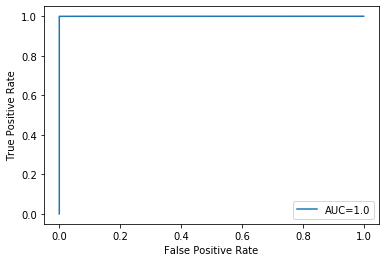

In [214]:
y_pred_xgb, tpr_xgb, fpr_xgb, roc_auc_xgb = plot_roc_curve(best_xgb)

Original ROC area: 1.000


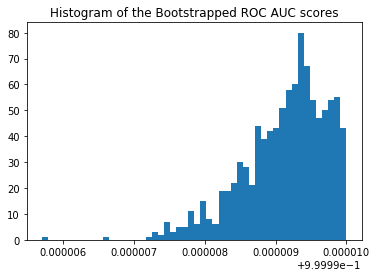

Confidence interval for the score: [1.000 - 1.0]


In [215]:
plot_conf_int(y_pred_xgb)

In [216]:
show_classification_report(best_xgb)

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       859
         1.0       1.00      1.00      1.00     41281

    accuracy                           1.00     42140
   macro avg       1.00      1.00      1.00     42140
weighted avg       1.00      1.00      1.00     42140



In [217]:
forest = RandomForestClassifier()

hyparams_forest = dict(n_estimators=list(range(50,1050,50)),
                       criterion=['gini','entropy'],
                       max_depth=list(range(1,101)),
                       min_samples_split=list(range(1,101)),
                       max_features=['sqrt','log2','None'],
                       bootstrap=[True,False])

best_forest = rs_cv_fit_score(forest, hyparams_forest)

Best Parameters -  {'n_estimators': 950, 'min_samples_split': 40, 'max_features': 'sqrt', 'max_depth': 65, 'criterion': 'entropy', 'bootstrap': True}
Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy - 1.00Accuracy -

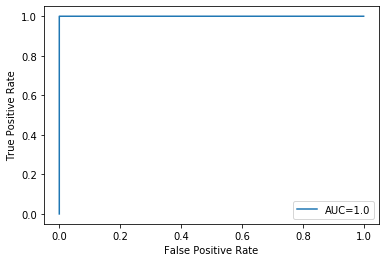

In [218]:
y_pred_forest, tpr_forest, fpr_forest, roc_auc_forest = plot_roc_curve(best_forest)

Original ROC area: 1.000


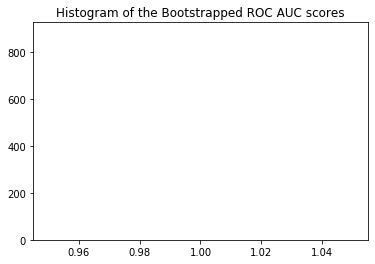

Confidence interval for the score: [1.000 - 1.0]


In [219]:
plot_conf_int(y_pred_forest)

In [220]:
show_classification_report(best_forest)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       859
         1.0       1.00      1.00      1.00     41281

    accuracy                           1.00     42140
   macro avg       1.00      1.00      1.00     42140
weighted avg       1.00      1.00      1.00     42140



In [221]:
logreg = LogisticRegression()

hyparams_logreg = dict(penalty=['l2','none'],
                       C=np.linspace(0.001,1000),
                       solver=['newton-cg','lbfgs','sag'],
                       max_iter=[5000])

best_logreg = rs_cv_fit_score(logreg, hyparams_logreg)

/gpfs/runtime/opt/anaconda/2020.02/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/gpfs/runtime/opt/anaconda/2020.02/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/gpfs/runtime/opt/anaconda/2020.02/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/gpfs/runtime/opt/anaconda/2020.02/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/gpfs/runtime/opt/anaconda/2020.02/lib/python3.7/site-packages/scipy/optimiz

Best Parameters -  {'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 5000, 'C': 714.286}
Accuracy - 0.98Accuracy - 0.98Accuracy - 0.98Accuracy - 0.98Accuracy - 0.98Accuracy - 0.98Accuracy - 0.98Accuracy - 0.98Accuracy - 0.98Accuracy - 0.98Accuracy - 0.98Accuracy - 0.98Accuracy - 0.98Accuracy - 0.98Accuracy - 0.98Accuracy - 0.98Accuracy - 0.98Accuracy - 0.98Accuracy - 0.98Accuracy - 0.98Accuracy - 0.98Accuracy - 0.98Accuracy - 0.98Accuracy - 0.98Accuracy - 0.98Accuracy - 0.98Accuracy - 0.98Accuracy - 0.98Accuracy - 0.98Accuracy - 0.98Accuracy - 0.98Accuracy - 0.98Accuracy - 0.98Accuracy - 0.98Accuracy - 0.98Accuracy - 0.98Accuracy - 0.98Accuracy - 0.98Accuracy - 0.98Accuracy - 0.98Accuracy - 0.98Accuracy - 0.98Accuracy - 0.98Accuracy - 0.98Accuracy - 0.98Accuracy - 0.98Accuracy - 0.98Accuracy - 0.98Accuracy - 0.98Accuracy - 0.98Accuracy - 0.98Accuracy - 0.98Accuracy - 0.98Accuracy - 0.98Accuracy - 0.98Accuracy - 0.98Accuracy - 0.98Accuracy - 0.98Accuracy - 0.98Accuracy - 0.98Accuracy

/gpfs/runtime/opt/anaconda/2020.02/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/gpfs/runtime/opt/anaconda/2020.02/lib/python3.7/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


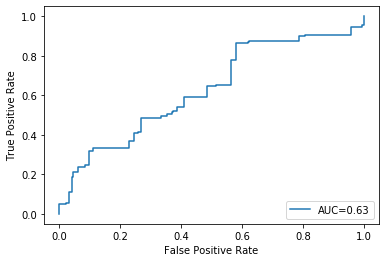

In [222]:
y_pred_logreg, tpr_logreg, fpr_logreg, roc_auc_logreg = plot_roc_curve(best_logreg)

Original ROC area: 0.629


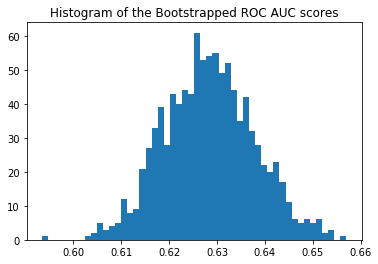

Confidence interval for the score: [0.610 - 0.648]


In [223]:
plot_conf_int(y_pred_logreg)

In [224]:
show_classification_report(best_logreg)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       859
         1.0       0.98      1.00      0.99     41281

    accuracy                           0.98     42140
   macro avg       0.49      0.50      0.49     42140
weighted avg       0.96      0.98      0.97     42140



/gpfs/runtime/opt/anaconda/2020.02/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [225]:
scores = pd.DataFrame()
scores['Model'] = ['Logistic Regression',
                   'Random Forest',
                   'XGBoost']
scores['Accuracy'] = [round(best_logreg.best_score_,4),
                   round(best_forest.best_score_,4),
                   round(best_xgb.best_score_,4)]
scores.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
1,Random Forest,0.9999
2,XGBoost,0.9999
0,Logistic Regression,0.9815


Text(0.5, 1.0, 'ROC Curves')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

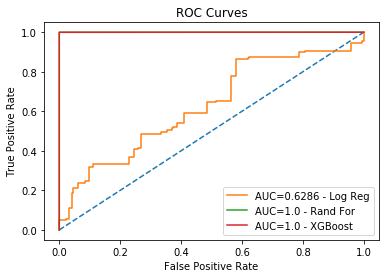

In [226]:
roc_no_skill = [0 for entry in range(len(y_test))]
roc_auc_no_skill = roc_auc_score(y_test, roc_no_skill)
fpr_no_skill, tpr_no_skill, thresholds_no_skill = roc_curve(y_test, roc_no_skill)
plt.plot(fpr_no_skill, tpr_no_skill, linestyle='--')
plt.plot(fpr_logreg, tpr_logreg, label = "AUC=" + str(round(roc_auc_logreg,4)) +' - Log Reg')
plt.plot(fpr_forest, tpr_forest, label = "AUC=" + str(round(roc_auc_forest,4)) +' - Rand For')
plt.plot(fpr_xgb, tpr_xgb, label = "AUC=" + str(round(roc_auc_xgb,4)) +' - XGBoost')
plt.title('ROC Curves')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [227]:
skf = StratifiedKFold(n_splits=4, shuffle=True)
models = [('lr', best_logreg),
          ('rf', best_forest),
          ('xgb', best_xgb)]
stacked_clf = StackingClassifier(estimators=models, final_estimator=XGBClassifier())
cv_scores = cross_val_score(stacked_clf, X_train, y_train, scoring='accuracy', cv=skf)
cv_scores
print('Accuracy - %0.2f' % (cv_scores.mean()))

NameError: name 'StratifiedKFold' is not defined